In [5]:
import pandas as pd
import openpyxl

# Read the Excel file.
course_path = "C:\\Users\\rubesam\\OneDrive - IESEG\\Teaching\\Portfolio Management PGE\\Materials\\"

file_path = course_path + "Data\\Data_ETFs.xlsx"
sheet_name = "ETF_prices"

# Read the sheet "ETF_prices" and set the "Date" column as the index
df_prices = pd.read_excel(file_path, sheet_name=sheet_name, index_col='Date')
df_prices

# keep only data from when all data is available
first_valid_index = max(df_prices.apply(lambda col: col.first_valid_index()))
first_valid_index 
df_prices = df_prices[first_valid_index:]

# Read the sheet "ETF_TRs" and set the "Date" column as the index
sheet_name = "ETF_TRs"
df_trs = pd.read_excel(file_path, sheet_name=sheet_name, index_col='Date')
df_trs

# keep only data from when all data is available
first_valid_index = max(df_trs.apply(lambda col: col.first_valid_index()))
first_valid_index 
df_trs = df_trs[first_valid_index:]

# we now have 2 pandas, one with prices and the other with total return indices
# let's calculate daily returns for each of them

rets_px = df_prices.pct_change()
rets_tr = df_trs.pct_change()

# set first values to 0 
rets_px.iloc[0] = 0
rets_tr.iloc[0] =0

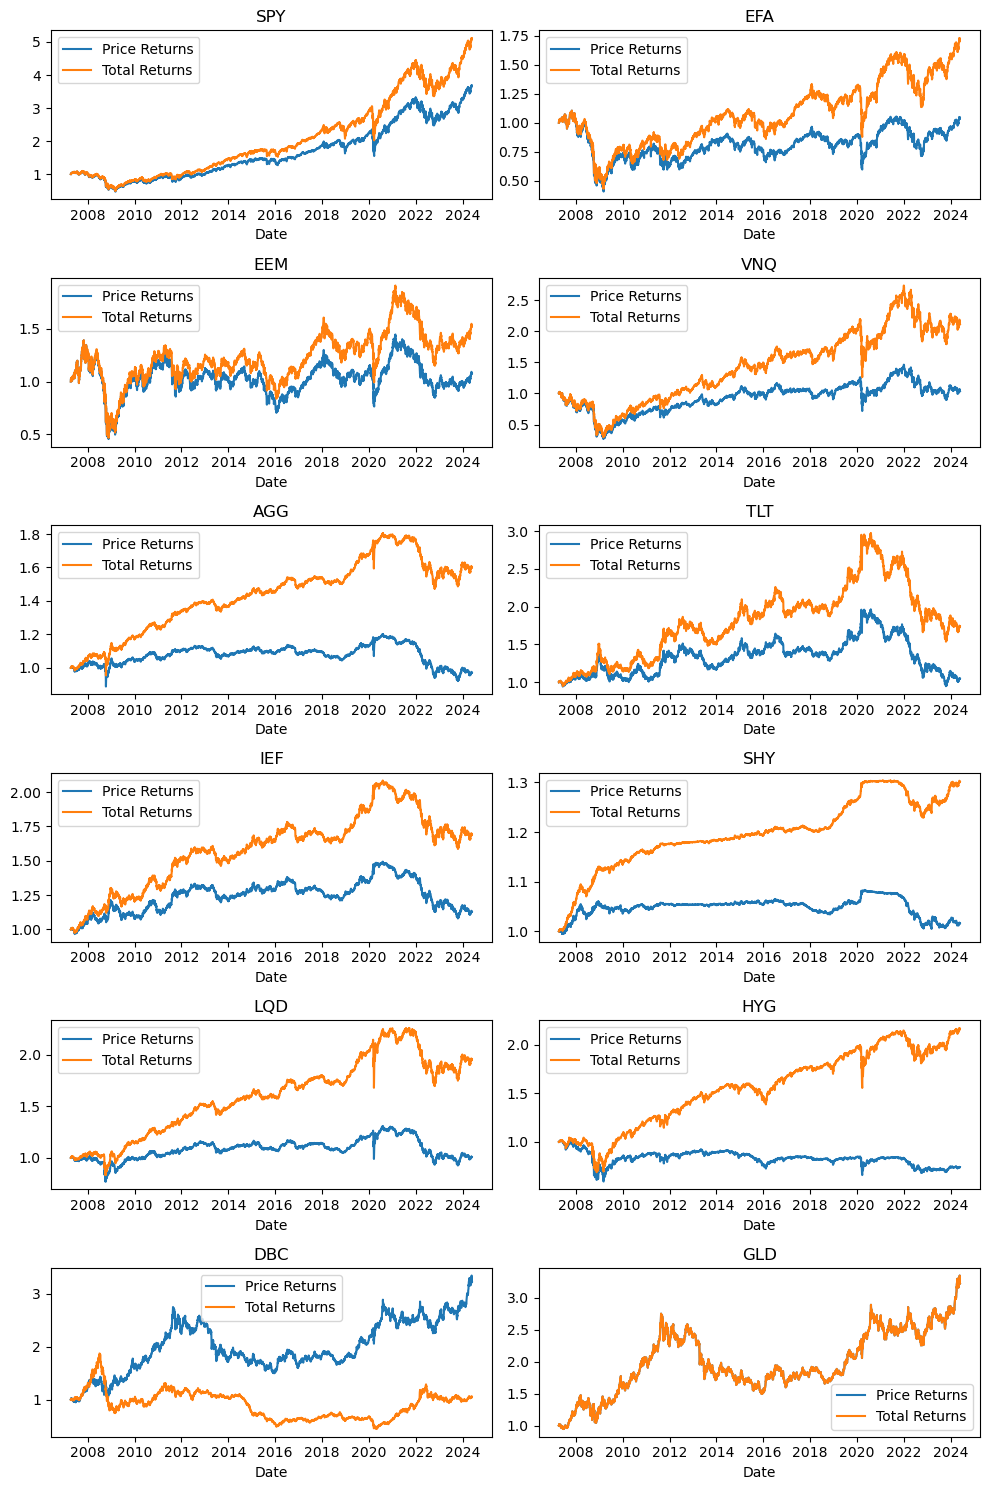

In [7]:
import matplotlib.pyplot as plt

# plot cumulative returns of all ETFs using either price returns or total returns
cum_rets_px = (1 + rets_px).cumprod()
cum_rets_tr = (1 + rets_tr).cumprod()

# plot everything in a subplot
fig, ax = plt.subplots(6, 2, figsize=(10, 15))
ax = ax.flatten()
for i, col in enumerate(cum_rets_px.columns):
    ax[i].plot(cum_rets_px[col], label='Price Returns')
    ax[i].plot(cum_rets_tr[col], label='Total Returns')
    ax[i].set_title(col)
    ax[i].set_xlabel('Date')
    ax[i].legend()
    
plt.tight_layout()

In [8]:
cum_rets_px

,SPY,EFA,EEM,VNQ,AGG,TLT,IEF,SHY,LQD,HYG,DBC,GLD
Date,,,,,,,,,,,,
2007-04-11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-04-12,1.004444,1.006677,1.016719,0.993195,1.001204,1.000229,1.000971,0.999875,1.001505,1.000671,0.998658,0.998658
2007-04-13,1.009027,1.010015,1.022876,1.004411,0.999599,0.997139,0.999272,0.999376,0.999812,0.998850,1.011330,1.011330
2007-04-16,1.018609,1.020673,1.034355,1.005671,1.001606,1.002632,1.000364,0.999251,1.000658,0.998467,1.019678,1.019678
2007-04-17,1.021316,1.020801,1.028283,1.018778,1.004517,1.008241,1.004612,1.000874,1.006114,0.997988,1.013715,1.013715
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-20,3.680461,1.049050,1.088755,1.063516,0.970390,1.042921,1.128277,1.015976,1.007713,0.740968,3.347645,3.347645
2024-05-21,3.689488,1.047381,1.082017,1.063138,0.972197,1.048300,1.131189,1.016475,1.009406,0.740393,3.342725,3.342725
2024-05-22,3.678864,1.037494,1.078524,1.053560,0.970993,1.049559,1.129733,1.015726,1.007901,0.738764,3.281306,3.281306


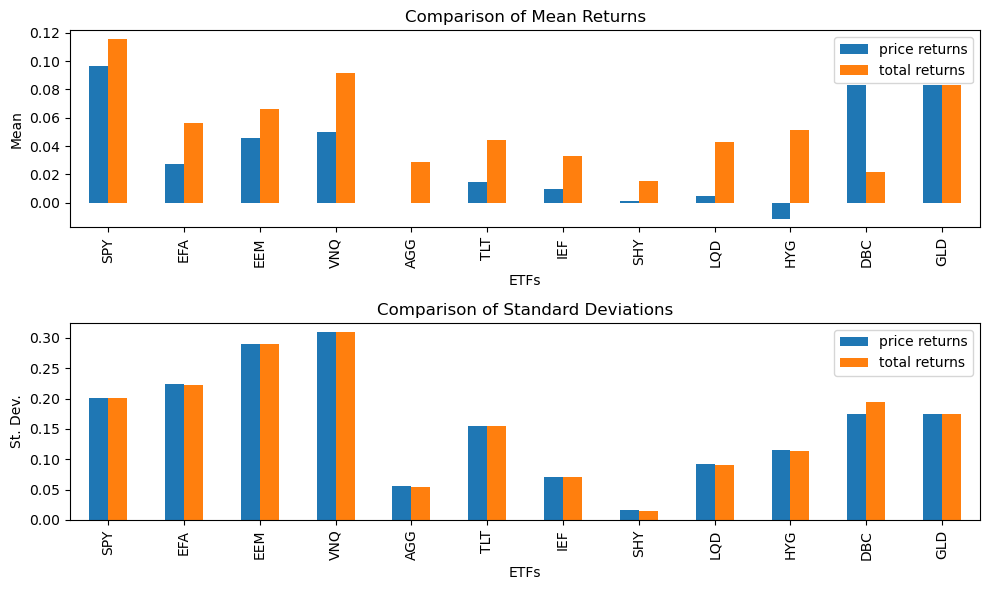

In [3]:
# calculate average returns and volatilites. Annualize and plot
import numpy as np
rets_px_mean = rets_px.mean() * 252.0
rets_tr_mean = rets_tr.mean() * 252.0
etf_means = pd.DataFrame({'px_mean': rets_px_mean, 'tr_mean': rets_tr_mean})

rets_px_sd = rets_px.std() * np.sqrt(252.0)
rets_tr_sd = rets_tr.std() * np.sqrt(252.0)
etf_sds = pd.DataFrame({'px_sd': rets_px_sd, 'tr_sd': rets_tr_sd})

# plot everything in a subplot. Average returns on top panel, volatilities on the bottom
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
etf_means.plot(kind='bar', ax = ax[0], figsize=(10, 6))
ax[0].set_xlabel('ETFs')
ax[0].set_ylabel('Mean')
ax[0].set_title('Comparison of Mean Returns')
ax[0].legend(['price returns', 'total returns'])

etf_sds.plot(kind='bar', ax = ax[1], figsize=(10, 6))
ax[1].set_xlabel('ETFs')
ax[1].set_ylabel('St. Dev.')
ax[1].set_title('Comparison of Standard Deviations')
ax[1].legend(['price returns', 'total returns'])
plt.tight_layout()


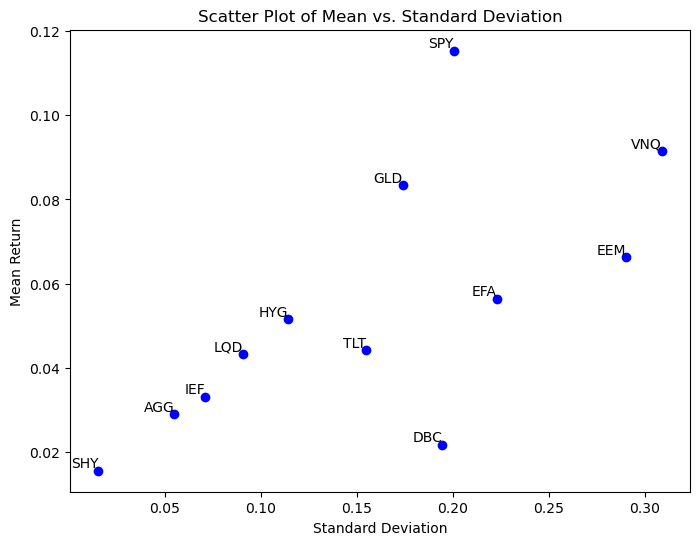

In [5]:
# not let's do a scatter plot of expected returns (on the y axis) vs risk (std deviation, on the x axis)
plt.figure(figsize=(8, 6))
plt.scatter(rets_tr_sd, rets_tr_mean, color='blue')

# Add labels for each point
for i, txt in enumerate(rets_tr_mean.index):
    plt.text(rets_tr_sd[txt], rets_tr_mean[txt], txt, ha='right', va='bottom')

# Set labels and title
plt.xlabel('Standard Deviation')
plt.ylabel('Mean Return')
plt.title('Scatter Plot of Mean vs. Standard Deviation')

plt.savefig('Scatter_Mu_Sigma.png')


<Axes: >

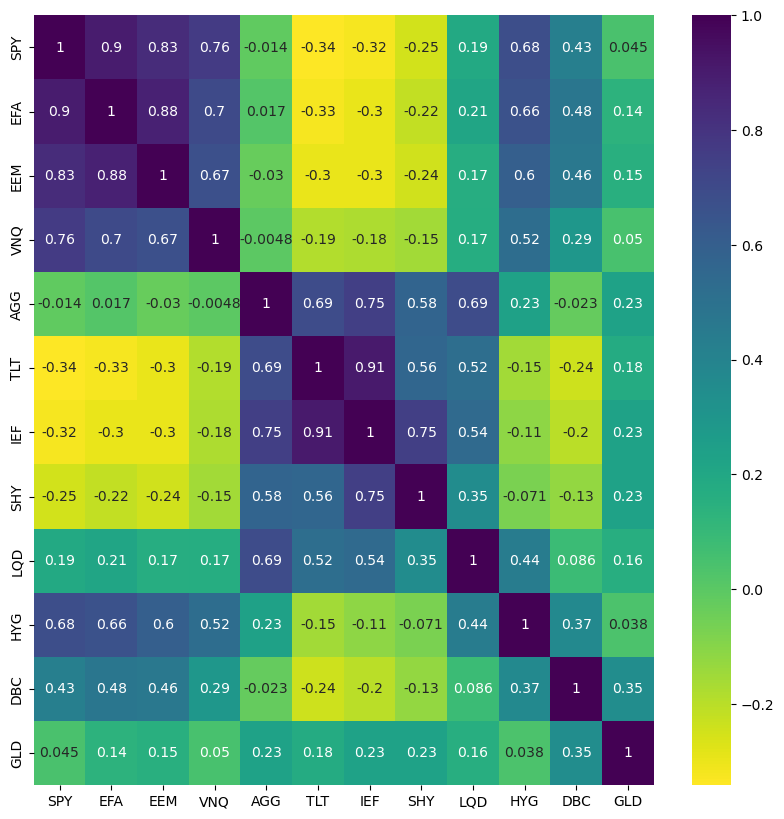

In [174]:
# finally, let's look at the correlations between the assets

# this can be done trivially since the returns are stored in a pandas
rets_tr.corr()

# alternatively, we can plot a heatmap using seaborn. We can see clear clusters of correlations by asset class
import seaborn as sb
corr = rets_tr.corr()
fig = plt.figure(figsize=(10,10))
sb.heatmap(corr, cmap="viridis_r", annot=True)
